## Analiza komunikacji miejskiej we Wrocławiu


**Tworzenie sieci**

In [1]:
import pandas as pd
import xml.etree.ElementTree as ET
import networkx as nx
import matplotlib.pyplot as plt
import collections

In [9]:
def create_graph_from(lines):
    data_tram = pd.DataFrame( columns=['source', 'target', 'delta_time', 'line_name' ])
    data_bus = pd.DataFrame( columns=['source', 'target', 'delta_time', 'line_name' ])
    for index, line in enumerate(lines):
        tree = ET.parse(f'data/XML-rozkladyjazdy/{line}/{line}.xml')
        root = tree.getroot()
        czasy_list = []
        if line.isdigit():
            line_name = str(int(line))
        else:
            line_name = line
        linia = root.find('linia')
        print()
        
        wariant = linia.find('wariant')
        przystanek = wariant.find('przystanek')
        czasy = przystanek.find('czasy')
        for przystanek_czas in czasy.findall('przystanek'):
            czasy_list.append({
                                'nazwa': przystanek_czas.get('nazwa'),
                                 'czas': przystanek_czas.get('czas')})
        df = pd.DataFrame(czasy_list)
        df['czas'] = df['czas'].fillna(0).astype(int)
        df['source'] = df['nazwa'].shift(1)
        df['target'] = df['nazwa']
        df['delta_time'] = df['czas'] - df['czas'].shift(1)
        df.dropna(inplace=True)
        df = df.drop(['nazwa','czas'], axis=1)
        df['line_name'] = line_name
        if "tram" in linia.attrib['typ']:
            data_tram = pd.concat([data_tram, df], axis=0)
        else:
            data_bus = pd.concat([data_bus, df], axis=0)

    return data_tram, data_bus

In [16]:
import os
line_names = []
for path, subdirs, files in os.walk("data"):
    for name in files:
        line_names.append(name[:4])

print(line_names)

df_tram, df_bus = create_graph_from(line_names)
print(df_bus['line_name'].head())

['0148', '0345', '0146', '0112', '0911', '0115', '0123', '0920', '0124', '0927', '0147', '0140', '0716', '0149', '0125', '0122', '0921', '0114', '0319', '0917', '0113', '000d', '0253', '000c', '0003', '0004', '0032', '000k', '0607', '0255', '0206', '0033', '0005', '0002', '0020', '0011', '0016', '0248', '0241', '0246', '0074', '0017', '0010', '0247', '0240', '0612', '0249', '0131', '0109', '0136', '0903', '0100', '0138', '0904', '0107', '0106', '0101', '0934', '0108', '0137', '0933', '0130', '0958', '0967', '0116', '0129', '0111', '0315', '0127', '0924', '0118', '0120', '0923', '0948', '0145', '0941', '0142', '0714', '0121', '0126', '0119', '0110', '0913', '0117', '0128', '0914', '0940', '0143', '0947', '0144', '0007', '0009', '0031', '0257', '0250', '000n', '0259', '0602', '0008', '0001', '0003', '0004', '0032', '0033', '0005', '0002', '0020', '0011', '0016', '0074', '0017', '0010', '0007', '0009', '0031', '0008', '0001', '0006', '0070', '0023', '0015', '0006', '0251', '000a', '0245',

In [33]:
df_tram.to_csv("traje.csv")
df_bus.to_csv("busy.csv")

In [19]:
mpk_graph_tram = nx.from_pandas_edgelist(df_tram, 'source', 'target', edge_attr=['delta_time', 'line_name'], create_using=nx.MultiDiGraph())

mpk_graph_tram.edges()


OutMultiEdgeDataView([('KSIĘŻE MAŁE', 'Głubczycka'), ('KSIĘŻE MAŁE', 'Głubczycka'), ('Głubczycka', 'Karwińska'), ('Głubczycka', 'Karwińska'), ('Głubczycka', 'KSIĘŻE MAŁE'), ('Głubczycka', 'KSIĘŻE MAŁE'), ('Karwińska', 'Park Wschodni'), ('Karwińska', 'Park Wschodni'), ('Karwińska', 'Głubczycka'), ('Karwińska', 'Głubczycka'), ('Park Wschodni', 'Armii Krajowej'), ('Park Wschodni', 'Armii Krajowej'), ('Park Wschodni', 'Karwińska'), ('Park Wschodni', 'Karwińska'), ('Armii Krajowej', 'KRAKOWSKA (Centrum handlowe)'), ('Armii Krajowej', 'KRAKOWSKA (Centrum handlowe)'), ('Armii Krajowej', 'Park Wschodni'), ('Armii Krajowej', 'Park Wschodni'), ('KRAKOWSKA (Centrum handlowe)', 'Krakowska'), ('KRAKOWSKA (Centrum handlowe)', 'Krakowska'), ('KRAKOWSKA (Centrum handlowe)', 'Armii Krajowej'), ('KRAKOWSKA (Centrum handlowe)', 'Armii Krajowej'), ('Krakowska', 'Na Niskich Łąkach'), ('Krakowska', 'Na Niskich Łąkach'), ('Krakowska', 'KRAKOWSKA (Centrum handlowe)'), ('Krakowska', 'KRAKOWSKA (Centrum handlow

In [20]:
mpk_graph_bus = nx.from_pandas_edgelist(df_bus, 'source', 'target', edge_attr=['delta_time', 'line_name'], create_using=nx.MultiDiGraph())

mpk_graph_bus.edges()

OutMultiEdgeDataView([('Dworzec Główny (Dworcowa)', 'Wzgórze Partyzantów'), ('Dworzec Główny (Dworcowa)', 'Wzgórze Partyzantów'), ('Dworzec Główny (Dworcowa)', 'skwer Krasińskiego'), ('Dworzec Główny (Dworcowa)', 'skwer Krasińskiego'), ('Dworzec Główny (Dworcowa)', 'Kościuszki'), ('Dworzec Główny (Dworcowa)', 'Kościuszki'), ('Wzgórze Partyzantów', 'Renoma'), ('Wzgórze Partyzantów', 'Renoma'), ('Wzgórze Partyzantów', 'Renoma'), ('Wzgórze Partyzantów', 'DWORZEC GŁÓWNY'), ('Wzgórze Partyzantów', 'DWORZEC GŁÓWNY'), ('Wzgórze Partyzantów', 'DWORZEC GŁÓWNY'), ('Wzgórze Partyzantów', 'DWORZEC GŁÓWNY'), ('Wzgórze Partyzantów', 'DWORZEC GŁÓWNY'), ('Wzgórze Partyzantów', 'DWORZEC GŁÓWNY'), ('Wzgórze Partyzantów', 'DWORZEC GŁÓWNY'), ('Wzgórze Partyzantów', 'GALERIA DOMINIKAŃSKA'), ('Wzgórze Partyzantów', 'GALERIA DOMINIKAŃSKA'), ('Wzgórze Partyzantów', 'GALERIA DOMINIKAŃSKA'), ('Wzgórze Partyzantów', 'GALERIA DOMINIKAŃSKA'), ('Renoma', 'pl. Orląt Lwowskich'), ('Renoma', 'pl. Orląt Lwowskich'), ('

# Analiza sieci

In [21]:
print('Linie tramwajowe')
print('Liczba węzłów', end=': ')
print(len(mpk_graph_tram.nodes()))


print('Liczba krawędzi', end=': ')
print(len(mpk_graph_tram.edges()))


print('Czy jest silnie połączony?', end=': ')
print(nx.is_strongly_connected(mpk_graph_tram))


print('Czy jest słabo połączony?', end=': ')
print(nx.is_weakly_connected(mpk_graph_tram))

print('Linie autobusowe')
print('Liczba węzłów', end=': ')
print(len(mpk_graph_bus.nodes()))
print('Liczba krawędzi', end=': ')
print(len(mpk_graph_bus.edges()))
print('Czy jest silnie połączony?', end=': ')
print(nx.is_strongly_connected(mpk_graph_bus))
print('Czy jest słabo połączony?', end=': ')
print(nx.is_weakly_connected(mpk_graph_bus))

Linie tramwajowe
Liczba węzłów: 164
Liczba krawędzi: 1096
Czy jest silnie połączony?: False
Czy jest słabo połączony?: True
Linie autobusowe
Liczba węzłów: 820
Liczba krawędzi: 2747
Czy jest silnie połączony?: False
Czy jest słabo połączony?: True


## Trzej królowie

Analiza stopni

Średni stopień węzła: 13.37


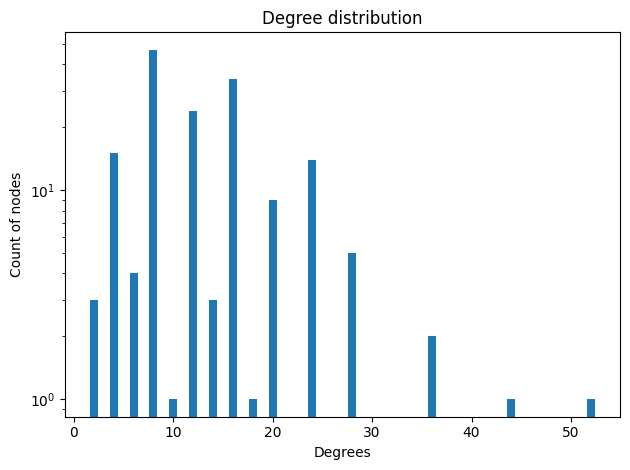

In [23]:
print('Średni stopień węzła', end=': ')
print('{:.2f}'.format(sum([x[1] for x in mpk_graph_tram.degree()])/len(mpk_graph_tram.degree())))

deg_count = dict(collections.Counter(sorted([d for n, d in mpk_graph_tram.degree()])))

plt.bar(deg_count.keys(), deg_count.values())
plt.yscale('log')
plt.title('Degree distribution')
plt.xlabel('Degrees')
plt.ylabel('Count of nodes')
plt.tight_layout()



In [80]:
# Max degree cenrtality
max(deg_count.values())

47

Analiza ścieżek (z wagą)

(Badanie dla grafu nieskierowanego, bo mpk_graph jest słabo połączony)

Średnia długość: 22.94 min
Średnica: 56.0 min
[0, 1.0, 3.0, 4.0, 5.0, 6.0, 7.0, 9.0, 10.0, 13.0, 15.0, 16.0, 16.0, 17.0, 18.0, 18.0, 18.0, 18.0, 18.0, 19.0, 19.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 21.0, 21.0, 21.0, 22.0, 22.0, 22.0, 22.0, 22.0, 23.0, 23.0, 23.0, 23.0, 23.0, 23.0, 23.0, 24.0, 24.0, 24.0, 24.0, 24.0, 24.0, 24.0, 24.0, 25.0, 25.0, 25.0, 25.0, 25.0, 25.0, 25.0, 25.0, 26.0, 26.0, 26.0, 26.0, 26.0, 26.0, 26.0, 26.0, 26.0, 26.0, 26.0, 27.0, 27.0, 27.0, 27.0, 28.0, 28.0, 28.0, 28.0, 28.0, 28.0, 28.0, 28.0, 28.0, 29.0, 29.0, 29.0, 29.0, 29.0, 30.0, 30.0, 30.0, 30.0, 30.0, 30.0, 30.0, 31.0, 31.0, 31.0, 31.0, 31.0, 31.0, 32.0, 32.0, 32.0, 32.0, 32.0, 32.0, 32.0, 33.0, 33.0, 33.0, 33.0, 33.0, 33.0, 33.0, 33.0, 34.0, 34.0, 34.0, 34.0, 34.0, 34.0, 34.0, 35.0, 35.0, 35.0, 35.0, 36.0, 36.0, 36.0, 36.0, 36.0, 36.0, 37.0, 37.0, 37.0, 37.0, 37.0, 38.0, 38.0, 38.0, 39.0, 39.0, 39.0, 40.0, 40.0, 40.0, 41.0, 41.0, 41.0, 41.0, 42.0, 42.0, 42.0, 43.0, 43.0, 44.0, 45.0, 46.0, 48.0, 49.0, 51.

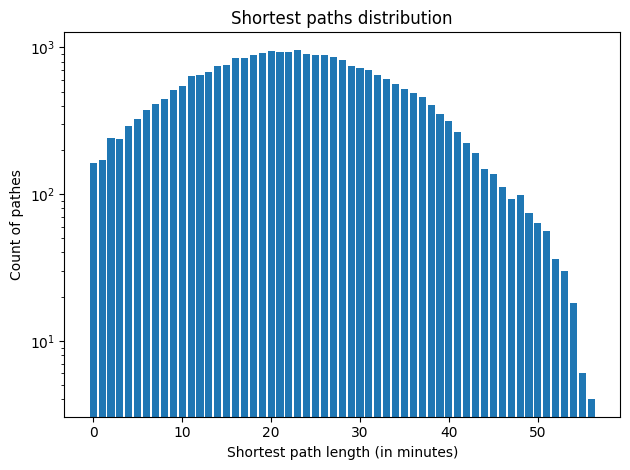

In [81]:
def flatten(l):
    return [item for sublist in l for item in sublist]

print('Średnia długość', end=': ')
print(round(nx.average_shortest_path_length(nx.Graph(mpk_graph_tram), weight='delta_time'),2), 'min')

print('Średnica', end=': ')
print(round(nx.diameter(nx.Graph(mpk_graph_tram), weight='delta_time'),2), 'min')

short_path = flatten([list(x[1].values()) for x in nx.shortest_path_length(nx.Graph(mpk_graph_tram), weight='delta_time')])
short_path_count = dict(collections.Counter(sorted([d for d in short_path])))
print(short_path)

plt.bar(short_path_count.keys(), short_path_count.values(), width=0.8)
plt.yscale('log')
plt.title('Shortest paths distribution')
plt.xlabel('Shortest path length (in minutes)')
plt.ylabel('Count of pathes')
plt.tight_layout()

Wspóczynnik grupowania

(Badanie dla grafu skierowanego nie multi)

Globalne grupowanie: 0.01


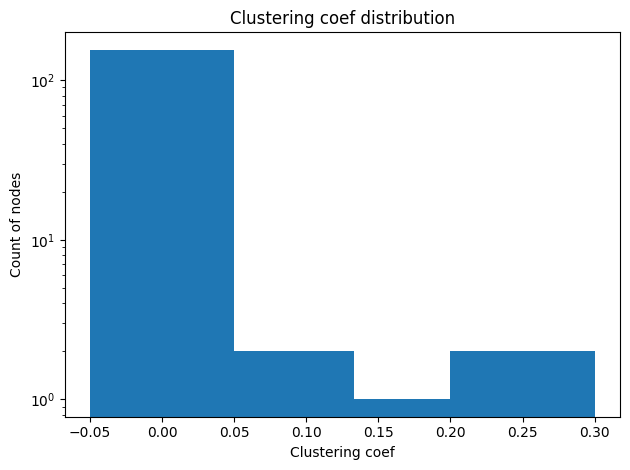

In [83]:
print('Globalne grupowanie', end=': ')
print(round(nx.average_clustering(nx.DiGraph(mpk_graph_tram)), 2))

clustering_count = dict(collections.Counter(sorted([d[1] for d in nx.clustering(nx.DiGraph(mpk_graph_tram)).items()])))
plt.bar(clustering_count.keys(), clustering_count.values(), width=0.1)
plt.yscale('log')
plt.title('Clustering coef distribution')
plt.xlabel('Clustering coef')
plt.ylabel('Count of nodes')
plt.tight_layout()

## Centrality

Betweennes

Sredni betweenness: 0.05


Text(0, 0.5, 'Count of nodes')

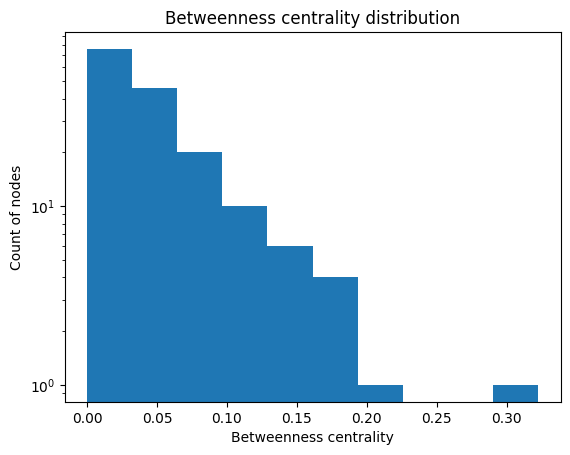

In [26]:
betweenness = nx.betweenness_centrality(mpk_graph_tram)

print('Sredni betweenness', end=': ')
print(round(sum(betweenness.values())/len(betweenness), 2))


plt.hist(betweenness.values())
plt.yscale('log')
plt.title('Betweenness centrality distribution')
plt.xlabel('Betweenness centrality')
plt.ylabel('Count of nodes')

In [77]:
bet_sorted=dict(sorted(betweenness.items(), key=lambda item: item[1],reverse=True))
print(f"Maksymalna wartość betweenness: {list(bet_sorted.values())[0]} dla {list(bet_sorted)[0]}")

Maksymalna wartość betweenness: 0.3225441187608875 dla GALERIA DOMINIKAŃSKA


## Pagerank

Sredni pagerank: 0.01
Maksymalna wartość pagerank: 0.020385635954559878 dla Wrocławski Park Przemysłowy


Text(0, 0.5, 'Count of nodes')

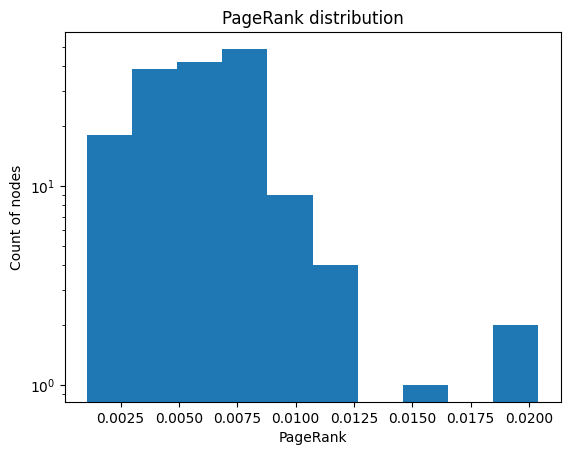

In [76]:
pageranks = nx.pagerank(mpk_graph_tram)

print('Sredni pagerank', end=': ')
print(round(sum(pageranks.values())/len(pageranks), 2))

pagerank_sorted=dict(sorted(pageranks.items(), key=lambda item: item[1],reverse=True))
print(f"Maksymalna wartość pagerank: {list(pagerank_sorted.values())[0]} dla {list(pagerank_sorted)[0]}")


plt.hist(pageranks.values())
plt.yscale('log')
plt.title('PageRank distribution')
plt.xlabel('PageRank')
plt.ylabel('Count of nodes')

## Closeness

Największy closeness: 0.0516
Średni closeness: 0.0307
Maksymalna wartość closeness: 0.051592237730942306 dla GALERIA DOMINIKAŃSKA


Text(0, 0.5, 'Count of nodes')

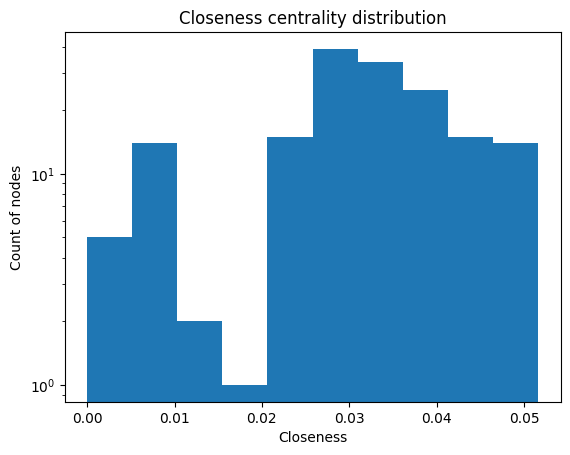

In [75]:
closeness = nx.closeness_centrality(mpk_graph_tram, distance='delta_time')

print('Największy closeness', end=': ')
print(round(max(closeness.values()), 4))

print('Średni closeness', end=': ')
print(round(sum(closeness.values())/len(closeness), 4))

degCent_sorted=dict(sorted(closeness.items(), key=lambda item: item[1],reverse=True))
print(f"Maksymalna wartość closeness: {list(degCent_sorted.values())[0]} dla {list(degCent_sorted)[0]}")


plt.hist(closeness.values())
plt.yscale('log')
plt.title('Closeness centrality distribution')
plt.xlabel('Closeness')
plt.ylabel('Count of nodes')

# Wizualizacja 

Badanie layoutów

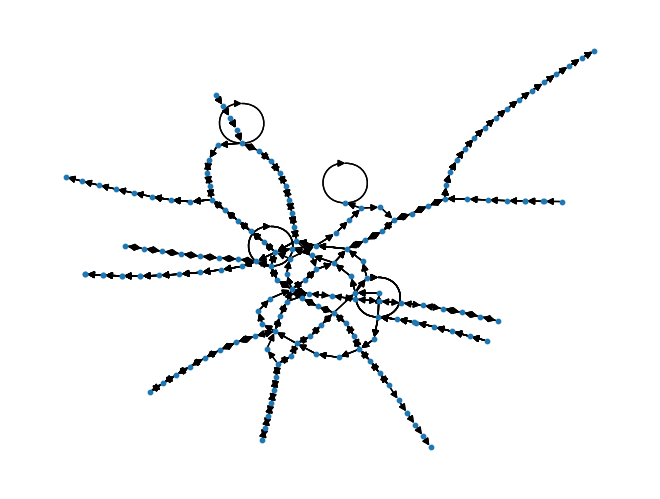

In [63]:
pos = nx.kamada_kawai_layout(mpk_graph_tram)
nx.draw(mpk_graph_tram, pos=pos, node_size=10)

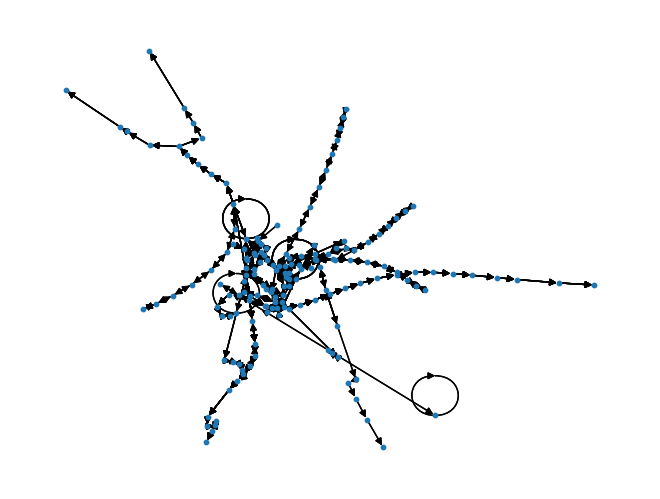

In [43]:
pos = nx.spring_layout(mpk_graph_tram)
nx.draw(mpk_graph_tram, pos=pos, node_size = 10)